# Mod 4 Project

# Rental Vacancy Rate

# Geographic Elimination Through Quarterly Census Data Analysis

### A balance of renters and homeowners is essential with low vacancy rate.
A location with homeowners is essential as foreclosures and probate instances only result from home ownership. Additionally, a location with a good amount of renters is essential to ensure that the property will be likely to be rented. Low rental vacancy rate is a good indicator that there is a low ratio of open rentals to renters. Homeowner vacancy rate is an indicator of how many homes are available for sale. 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import xlrd
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.metrics import r2_score
from pmdarima.arima import ndiffs

In [52]:
rental_vacancy = pd.read_excel('rental_vacancy_rates.xlsx')

In [53]:
rental_vacancy.head()

,Table with row headings in column A and column headings in row 4.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Table 1. Quarterly Rental Vacancy Rates: 1956 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year and Quarter,United States,Inside MSAs,Inside Principal Cities1,Outside Principal Cities1 (Suburbs),Outside MSAs,Northeast,Midwest2,South,West
3,19563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st…………......,6.2,4.8,NaN,NaN,8.9,3.3,5.2,7.9,9.7


In [54]:
rental_vacancy.columns = rental_vacancy.iloc[2]

In [55]:
rental_vacancy.shape

(436, 10)

In [56]:
rental_vacancy.drop(columns=['Inside Principal Cities1', 'Outside Principal Cities1 (Suburbs)', 'Inside MSAs', 'Outside MSAs'], inplace = True)

In [57]:
rental_vacancy.head()

2,Year and Quarter,United States,Northeast,Midwest2,South,West
0,Table 1. Quarterly Rental Vacancy Rates: 1956 ...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Year and Quarter,United States,Northeast,Midwest2,South,West
3,19563,NaN,NaN,NaN,NaN,NaN
4,1st…………......,6.2,3.3,5.2,7.9,9.7


### Edited and duplicated rows can be removed. 

In [58]:
rental_vacancy.drop([2,142,143,144,145,208,209,210,211,238,239,240,241,298,299,300,301], inplace = True)

In [59]:
rental_vacancy.dropna(inplace=True)

In [60]:
rental_vacancy.shape

(259, 6)

In [61]:
rental_vacancy.head()

2,Year and Quarter,United States,Northeast,Midwest2,South,West
4,1st…………......,6.2,3.3,5.2,7.9,9.7
5,2nd……….......,5.9,2.7,5.3,8.1,9.3
6,3rd………….......,6.3,3.3,6.3,8.5,8.3
7,4th…………......,5.8,3.1,5.6,8.1,7.4
10,1st…………......,5.3,3.5,5,6.4,6.9


In [62]:
rental_vacancy.reset_index(inplace=True)

In [63]:
rental_vacancy.head()

2,index,Year and Quarter,United States,Northeast,Midwest2,South,West
0,4,1st…………......,6.2,3.3,5.2,7.9,9.7
1,5,2nd……….......,5.9,2.7,5.3,8.1,9.3
2,6,3rd………….......,6.3,3.3,6.3,8.5,8.3
3,7,4th…………......,5.8,3.1,5.6,8.1,7.4
4,10,1st…………......,5.3,3.5,5,6.4,6.9


In [64]:
rental_vacancy.drop(columns='index', inplace=True)

In [65]:
rental_vacancy.head()

2,Year and Quarter,United States,Northeast,Midwest2,South,West
0,1st…………......,6.2,3.3,5.2,7.9,9.7
1,2nd……….......,5.9,2.7,5.3,8.1,9.3
2,3rd………….......,6.3,3.3,6.3,8.5,8.3
3,4th…………......,5.8,3.1,5.6,8.1,7.4
4,1st…………......,5.3,3.5,5,6.4,6.9


In [66]:
rental_vacancy['Time'] = pd.date_range('1956', '2020-07', freq='QS-JAN')

In [67]:
rental_vacancy.head()


2,Year and Quarter,United States,Northeast,Midwest2,South,West,Time
0,1st…………......,6.2,3.3,5.2,7.9,9.7,1956-01-01
1,2nd……….......,5.9,2.7,5.3,8.1,9.3,1956-04-01
2,3rd………….......,6.3,3.3,6.3,8.5,8.3,1956-07-01
3,4th…………......,5.8,3.1,5.6,8.1,7.4,1956-10-01
4,1st…………......,5.3,3.5,5,6.4,6.9,1957-01-01


In [68]:
rental_vacancy.rename(columns={'United States': 'United_States'}, inplace = True)

In [69]:
rental_vacancy.head()

2,Year and Quarter,United States,Northeast,Midwest2,South,West,Time
0,1st…………......,6.2,3.3,5.2,7.9,9.7,1956-01-01
1,2nd……….......,5.9,2.7,5.3,8.1,9.3,1956-04-01
2,3rd………….......,6.3,3.3,6.3,8.5,8.3,1956-07-01
3,4th…………......,5.8,3.1,5.6,8.1,7.4,1956-10-01
4,1st…………......,5.3,3.5,5,6.4,6.9,1957-01-01


In [70]:
rental_vacancy.drop(columns='Year and Quarter', inplace = True)

In [71]:
rental_vacancy.set_index('Time', inplace = True)

In [72]:
rental_vacancy.head()

2,United States,Northeast,Midwest2,South,West
Time,,,,,
1956-01-01,6.2,3.3,5.2,7.9,9.7
1956-04-01,5.9,2.7,5.3,8.1,9.3
1956-07-01,6.3,3.3,6.3,8.5,8.3
1956-10-01,5.8,3.1,5.6,8.1,7.4
1957-01-01,5.3,3.5,5,6.4,6.9


In [75]:
rental_vacancy.to_pickle("./rental_vacancy.pkl")

Text(0.5, 1.0, 'Quarterly Rental Vacancy')

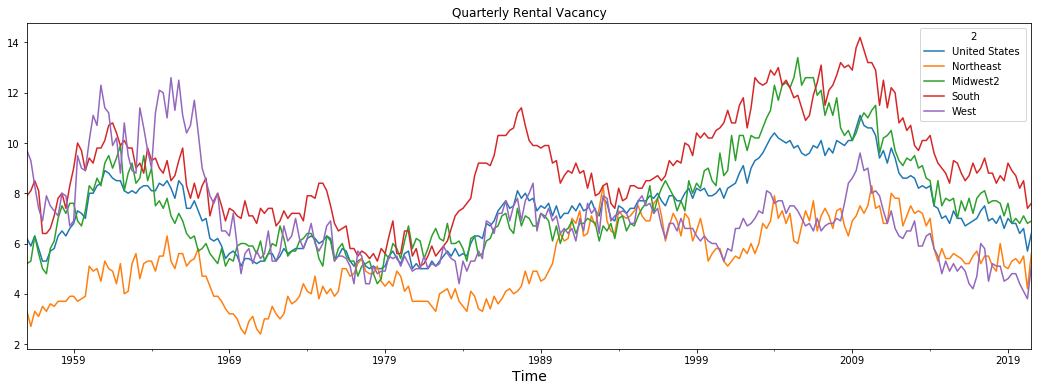

In [76]:
rental_vacancy.plot(figsize=(18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Quarterly Rental Vacancy')